In [54]:
from scipy.spatial.distance import cdist
import numpy as np
import random
import matplotlib.pyplot as plt

def d(data, labels, column_1_number, column_2_number, title):
    X = np.array(data)[:, column_1_number]
    Y = np.array(data)[:, column_2_number]
    cs = [labels[i] for i in range(len(labels))]
    plt.scatter(X, Y, c=cs, s=50)
    plt.xlim(0)
    plt.ylim(0)
    plt.title(title)
    plt.show()

class Forel:
    """ Получение центра масс набор объектов (массу каждого считаем равной 1). """
    @staticmethod
    def get_mass_center(objects):
        return sum(objects) / len(objects)

    """ Получение расстояния между двумя объектами в Евклидовом пространстве. """
    @staticmethod
    def distance_objects(object1, object2):
        object1 = np.asarray(tuple(object1)).reshape(1, -1)
        object2 = np.asarray(tuple(object2)).reshape(1, -1)

        return cdist(object1, object2, 'euclidean')[0][0]

    def __init__(self, data, radius):
        self.data = data
        self.radius = radius
        self.result = None
        self.clusters = None

    """ Получение и извлечение случайного объекта из выборки. """
    def get_rand_object(self):
        if len(self.data) == 0:
            return None
        if len(self.data) == 1:
            return self.data
        index = random.randint(0, len(self.data) - 1)
        rand_object = self.data[index]
        self.data = np.delete(self.data, index, 0)

        return rand_object

    """ Проверка наличия ещё некластеризованных объектов. """
    def clustering_not_finish(self):
        return len(self.data) != 0

    """ Получение похожих объектов. Критерий похожести - расстояние в Евклидовом пространстве. """
    def get_same_objects(self, object):
        same_objects = []
        counter = 0
        indexes = []
        for row in self.data:
            distance = self.distance_objects(object, row)
            if distance <= self.radius:
                same_objects.append(list(row))
                indexes.append(counter)
            counter += 1

        return [indexes, np.asarray(same_objects)]

    """ Удаление заданных объектов из выборки. """
    def remove_objects(self, same_object_indexes):
        self.data = np.delete(self.data, same_object_indexes, 0)

    """ Запускаем кластеризацию. """
    def run(self):
        self.clustered_objects = []

        while self.clustering_not_finish():
            # Извлекаем случайный элемент из выборки.
            currently_object = self.get_rand_object()

            # Получаем похоже на него объекты (находящиеся на расстоянии менее заданного).
            same_objects_info = self.get_same_objects(currently_object)
            same_object_indexes = same_objects_info[0]
            same_objects = same_objects_info[1]

            # Расчитываем центр масс полученного набора похожих объектов.
            if len(same_objects) == 0:
                center_object = currently_object
            else:
                center_object = self.get_mass_center(same_objects)

            # Стабилизируем центр масс.
            while self.distance_objects(currently_object, center_object) != 0:
                currently_object = center_object
                same_objects_info = self.get_same_objects(currently_object)
                same_object_indexes = same_objects_info[0]
                same_objects = same_objects_info[1]
                center_object = self.get_mass_center(same_objects)

            # Очищаем кластеризованные объекты из выборки.
            self.remove_objects(same_object_indexes)

            # Записываем кластеризованные объекты в результирующий массив.
            self.clustered_objects.append(same_objects_info[1])

        self.result = []
        self.clusters = []
        for cluster in range(len(self.clustered_objects)):
            for row in self.clustered_objects[cluster]:
                self.result.append(list(row))
                self.clusters.append(cluster)
                
    def res(self):
        print('clust')
        print(self.clusters)
        print('res')
        print(self.result)
                

    def plot(self, column_1_number, column_2_number):
        d(self.result, self.clusters,
                   column_1_number, column_2_number, title='FOREL results vizualization')

In [41]:
import numpy as np 
import pandas as pd 
from numpy import genfromtxt

In [47]:
data = genfromtxt('Копия KA_segm.csv', delimiter=',', dtype=float, skip_header=True, usecols=(1,3,4,5,6,7))
data

array([[1.00400000e+02, 6.00000000e+00, 3.50000000e-01, 8.00000000e-02,
        6.09739718e-01, 9.49382576e-01],
       [1.70000000e+02, 4.00000000e+00, 6.60000000e-01, 1.60000000e-01,
        9.42272482e-01, 4.79845583e-01],
       [7.07500000e+01, 6.00000000e+00, 9.20000000e-01, 2.00000000e-01,
        3.23030403e-01, 7.07575089e-03],
       ...,
       [9.42100000e+01, 2.00000000e+00, 4.10000000e-01, 8.00000000e-01,
        4.38509854e-01, 6.65808409e-01],
       [3.35000000e+00, 1.00000000e+00, 7.50000000e-01, 1.70000000e-01,
        9.27733487e-03, 5.72110604e-01],
       [3.45000000e+02, 1.80000000e+01, 1.10000000e-01, 2.80000000e-01,
        6.86899909e-02, 4.57037160e-01]])

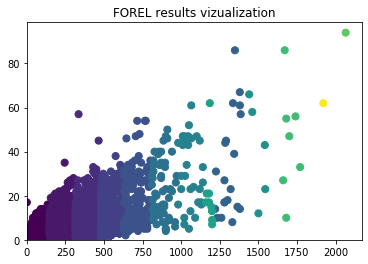

In [133]:
forel = Forel(data, radius=100)
forel.run()
forel.plot(0, 1)

In [50]:
from sklearn import datasets
iris = datasets.load_iris()

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [130]:
forel = Forel(iris.data, radius=3)
forel.run()

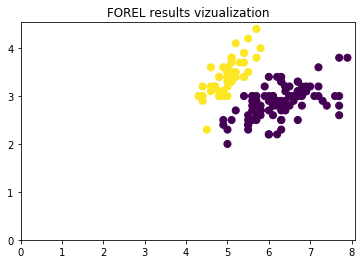

In [131]:
forel.plot(0, 1)

In [121]:
forel.res()

clust
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
res
[[7.0, 3.2, 4.7, 1.4], [6.4, 3.2, 4.5, 1.5], [6.9, 3.1, 4.9, 1.5], [5.5, 2.3, 4.0, 1.3], [6.5, 2.8, 4.6, 1.5], [5.7, 2.8, 4.5, 1.3], [6.3, 3.3, 4.7, 1.6], [4.9, 2.4, 3.3, 1.0], [6.6, 2.9, 4.6, 1.3], [5.2, 2.7, 3.9, 1.4], [5.0, 2.0, 3.5, 1.0], [5.9, 3.0, 4.2, 1.5], [6.0, 2.2, 4.0, 1.0], [6.1, 2.9, 4.7, 1.4], [5.6, 2.9, 3.6, 1.3], [6.7, 3.1, 4.4, 1.4], [5.6, 3.0, 4.5, 1.5], [5.8, 2.7, 4.1, 1.0], [6.2, 2.2, 4.5, 1.5], [5.6, 2.5, 3.9, 1.1], [5.9, 3.2, 4.8, 1.8], [6.1, 2.8, 4.0, 1.3], [6.3, 2.5, 4.9, 1.5], [6.1, 2.8, 4.7, 1.2], [6.4, 2.9, 4.3, 